**1. Importing libraries**

In [6]:
! pip install fancyimpute



  Using cached fancyimpute-0.7.0.tar.gz (25 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached knnimpute-0.1.0.tar.gz (8.3 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cvxpy-1.3.2-cp311-cp311-macosx_10_9_universal2.whl (1.2 MB)
  Using cached cvxopt-1.3.1-cp311-cp311-macosx_13_0_arm64.whl (11.1 MB)
  Using cached pytest-7.4.0-py3-none-any.whl (323 kB)
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Using cached osqp-0.6.3.tar.gz (228 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [115 lines of output]
        Using cached oldest_supported_numpy-2022.11.19-py3-none-any.whl (4.9 kB)
        Using cached setuptools-68.0.0-py3-none-any.whl 

In [7]:
! pip3 install scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [8]:
! pip install impyute


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [31]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 


2. Importing and organizing the data

In [33]:
d1= arff.loadarff('1year.arff')
df1 = pd.DataFrame(d1[0])
d2= arff.loadarff('2year.arff')
df2 = pd.DataFrame(d2[0])
d3= arff.loadarff('3year.arff')
df3 = pd.DataFrame(d3[0])
d4= arff.loadarff('4year.arff')
df4 = pd.DataFrame(d4[0])
d5= arff.loadarff('5year.arff')
df5 = pd.DataFrame(d5[0])

############################################################
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

############################################################
# dataframes is the list of pandas dataframes for the 5 year datafiles.  
DF= pd.concat([df1,df2,df3,df4,df5],axis = 0)
dataframes = [df1, df2, df3, df4, df5]

# Set the new headers for the dataframes. The new headers will have the renamed set of feature (X1 to X64)
set_new_headers(dataframes)    

# print the first 5 rows of a dataset 'year1'
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


2.A Convert the columns types for the features to float

In [34]:
# Convert the dtypes of all the columns (other than the class label columns) to float.
def convert_columns_type_float(dfs):
    for i in range(5):
        index = 1
        while(index<=63):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype(float)
            index+=1
            
convert_columns_type_float(dataframes)            

2.B Convert the class label types to int

In [35]:
# The class labels for all the dataframes are originally in object type.
# Convert them to int types
def convert_class_label_type_int(dfs):
    for i in range(len(dfs)):
        col = getattr(dfs[i], 'Y')
        dfs[i]['Y'] = col.astype(int)
        
convert_class_label_type_int(dataframes)

3. Data Analysis and Preprocessing

3.A Missing Data Analysis

In [36]:
############################################################
# Get Clean dataframes by dropping all the rows which have missing values
def drop_nan_rows(dataframes, verbose=False):
    clean_dataframes = [df.dropna(axis=0, how='any') for df in dataframes]
    if verbose:
        for i in range(len(dataframes)):
            print(str(i+1)+'year:','Original Length=', len(dataframes[i]), '\tCleaned Length=', len(clean_dataframes[i]), '\tMissing Data=', len(dataframes[i])-len(clean_dataframes[i]))
    return clean_dataframes

# Doing a quick analysis of how many missing values are there in each of the 5 dataframes
nan_dropped_dataframes = drop_nan_rows(dataframes, verbose=True)

1year: Original Length= 7027 	Cleaned Length= 3194 	Missing Data= 3833
2year: Original Length= 10173 	Cleaned Length= 4088 	Missing Data= 6085
3year: Original Length= 10503 	Cleaned Length= 4885 	Missing Data= 5618
4year: Original Length= 9792 	Cleaned Length= 4769 	Missing Data= 5023
5year: Original Length= 5910 	Cleaned Length= 3031 	Missing Data= 2879


3.A.a Generate Sparsity Matrix for the missing data

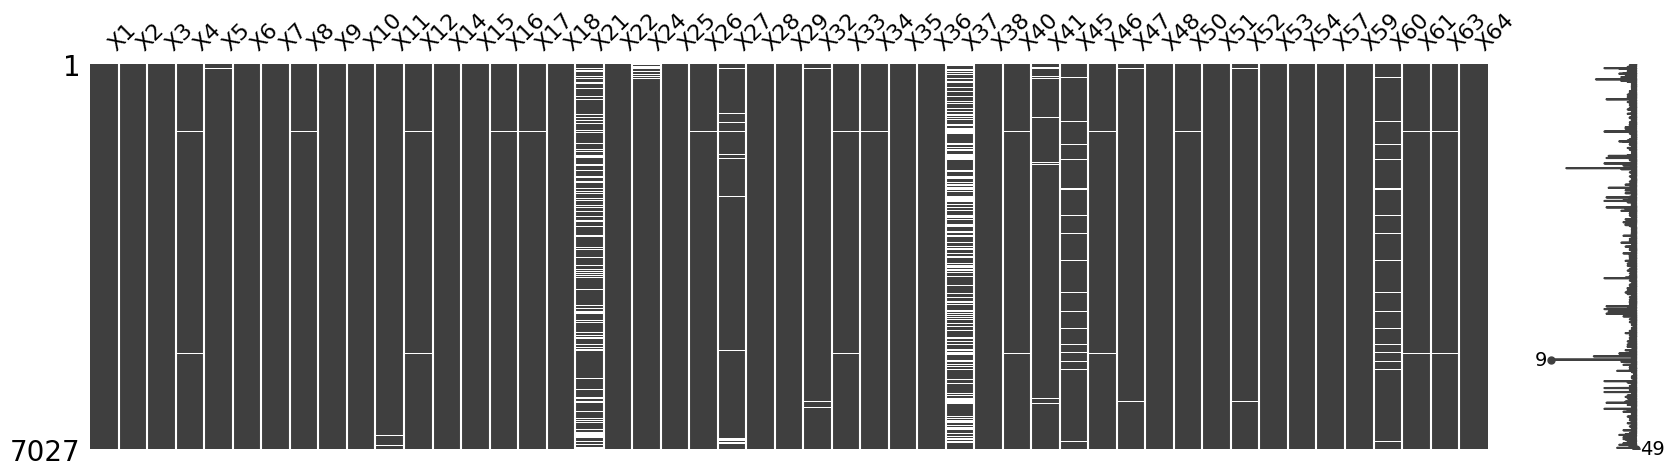

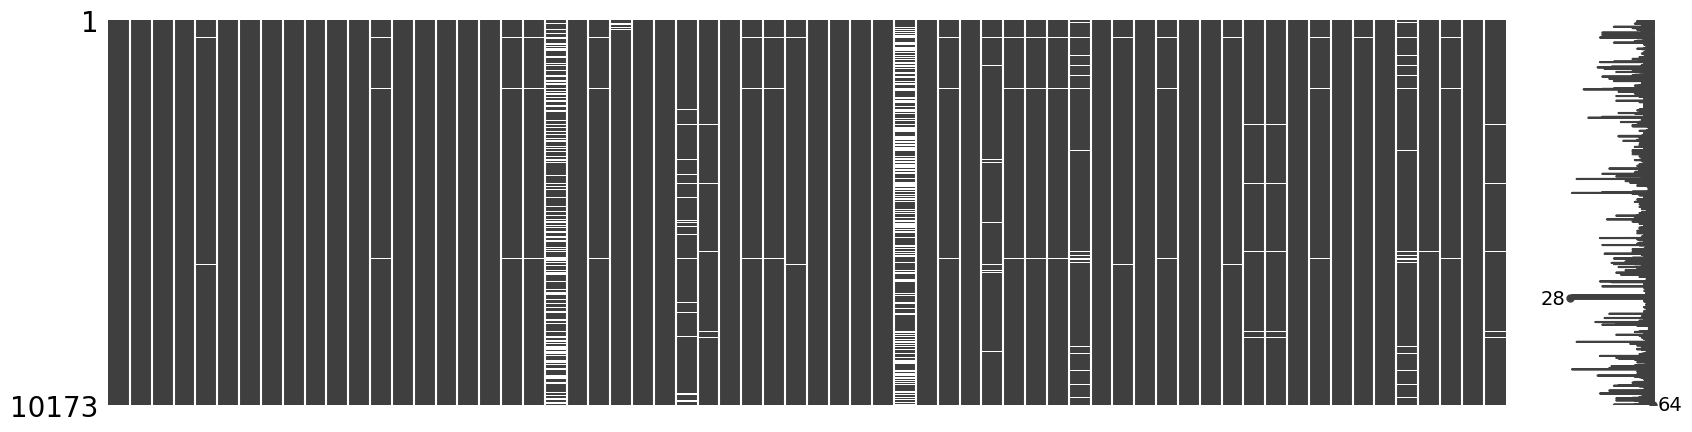

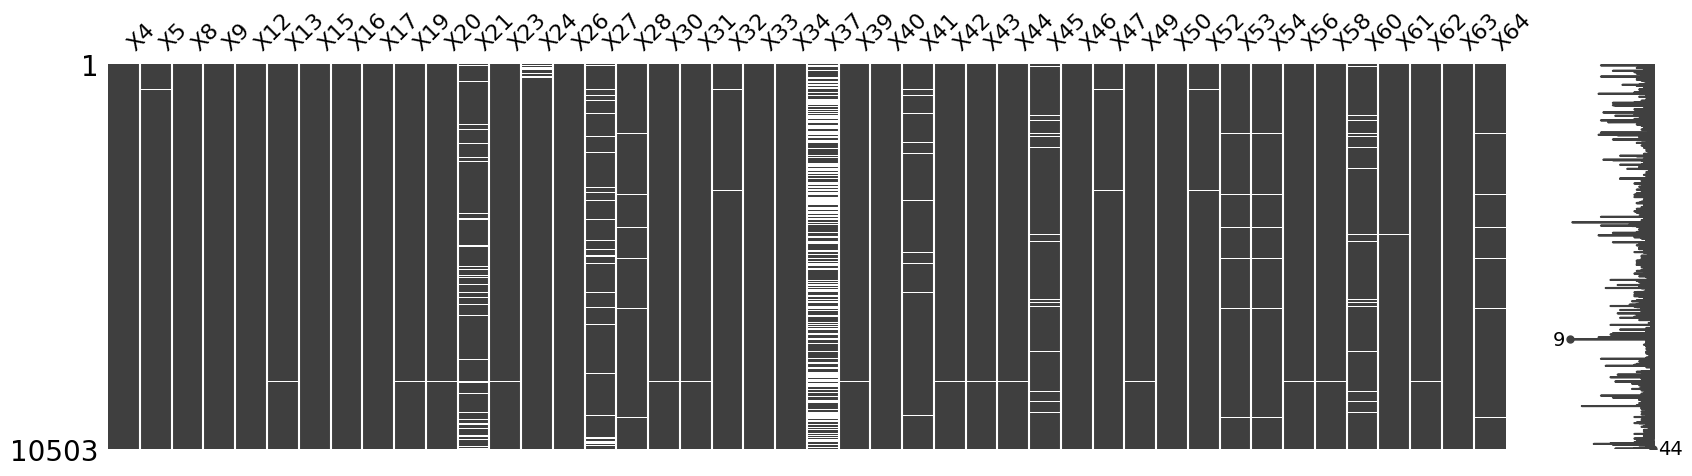

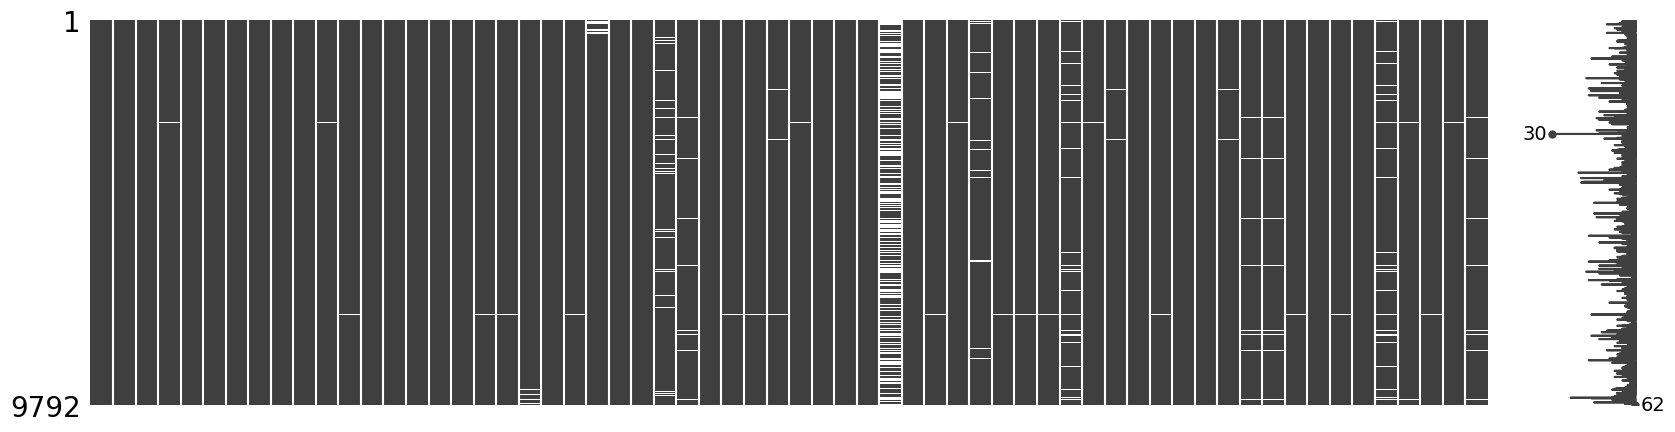

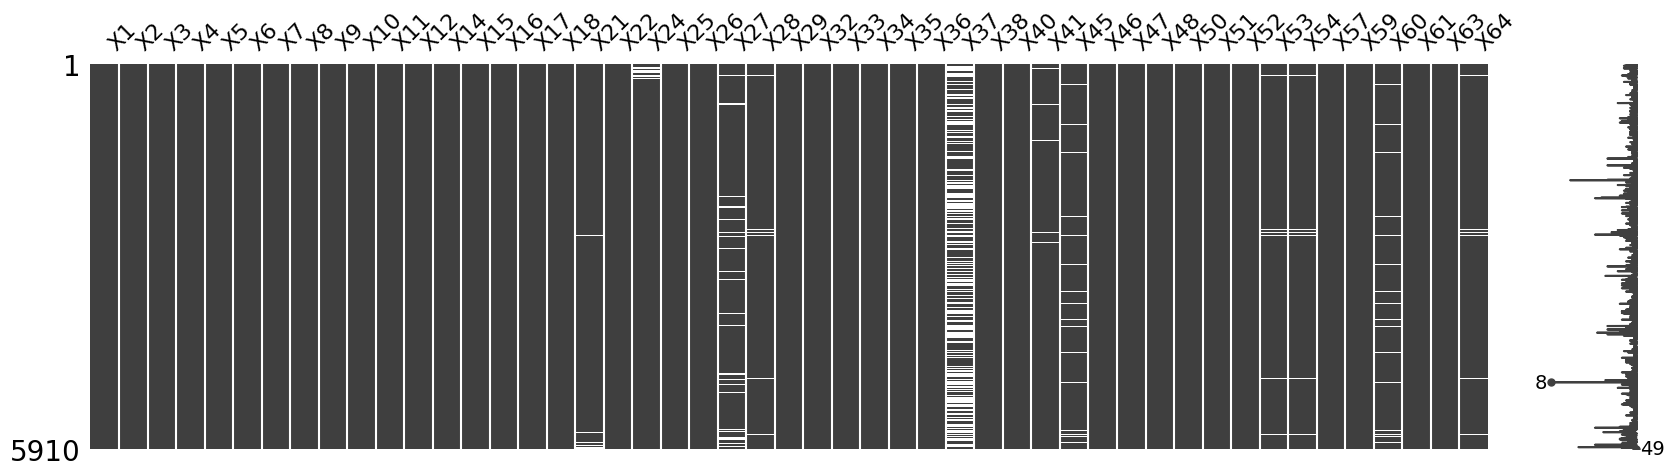

In [37]:
# generate the sparsity matrix (figure) for all the dataframes
def generate_sparsity_matrix(dfs):
    for i in range(5):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.matrix(dfs[i][missing_df_i], figsize=(20,5))

generate_sparsity_matrix(dataframes)

In [40]:
from sklearn.feature_selection import RFE
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
data_keys=list(DF.columns)
le=LabelEncoder()
#class /label encoding
DF['class']= le.fit_transform(DF['class'])
print(DF['class'].unique())


X= DF.drop('class',axis=1)
Y= DF['class']

imputer = SimpleImputer(strategy="mean")
X_imp = imputer.fit_transform(X)
classifier = lgb.LGBMClassifier()

#Select best feature 
rfe = RFE(classifier,n_features_to_select=12)
rfe = rfe.fit(X_imp,Y)
#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
pd.DataFrame(X_imp,columns=data_keys[:len(data_keys)-1]).columns[rfe.support_]
X_imp= pd.DataFrame(X_imp,columns=data_keys[:len(data_keys)-1])
X_fs= X_imp[X_imp.columns[rfe.support_]]


[0 1]
[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559
[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16065
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559


[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11985
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559
[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11730
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559
[Light

[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559
[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559
[LightGB

[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559
[LightGBM] [Info] Number of positive: 2091, number of negative: 41314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 43405, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048174 -> initscore=-2.983559
[LightGBM] [Info] Start training from score -2.983559
[LightGB

In [41]:
X_imp.columns[rfe.support_]

Index(['Attr5', 'Attr20', 'Attr22', 'Attr24', 'Attr27', 'Attr29', 'Attr34',
       'Attr39', 'Attr40', 'Attr44', 'Attr46', 'Attr58'],
      dtype='object')

3.A.b Generate Heat Map for the missing data

In [42]:
df1= df1.drop(['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8'],axis=1) 
df1= df1.drop(['X10', 'X11', 'X12', 'X13', 'X14', 'X15','X16'],axis=1)
df1= df1.drop (['X18', 'X19', 'X21','X23','X25', 'X26',  'X28'],axis=1)
df1= df1.drop (['X31', 'X32', 'X33', 'X35', 'X36','X37', 'X38'],axis=1) 
df1= df1.drop (['X42', 'X43', 'X45', 'X47', 'X48', 'X49', 'X50'],axis=1)
df1= df1.drop(['X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X59'],axis=1)
df1= df1.drop(['X61', 'X62', 'X63', 'X64'],axis=1)
df1=df1.drop(['X9', 'X17', 'X30',  'X41','X51', 'X60'],axis=1)

In [43]:
df2= df2.drop(['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8'],axis=1) 
df2= df2.drop(['X10', 'X11', 'X12', 'X13', 'X14', 'X15','X16'],axis=1)
df2= df2.drop (['X18', 'X19', 'X21','X23','X25', 'X26',  'X28'],axis=1)
df2= df2.drop (['X31', 'X32', 'X33', 'X35', 'X36','X37', 'X38'],axis=1) 
df2= df2.drop (['X42', 'X43', 'X45', 'X47', 'X48', 'X49', 'X50'],axis=1)
df2= df2.drop(['X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X59'],axis=1)
df2= df2.drop(['X61', 'X62', 'X63', 'X64'],axis=1)
df2=df2.drop(['X9', 'X17', 'X30',  'X41','X51', 'X60'],axis=1)

In [44]:
df3= df3.drop(['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8'],axis=1) 
df3= df3.drop(['X10', 'X11', 'X12', 'X13', 'X14', 'X15','X16'],axis=1)
df3= df3.drop (['X18', 'X19', 'X21','X23','X25', 'X26',  'X28'],axis=1)
df3= df3.drop (['X31', 'X32', 'X33', 'X35', 'X36','X37', 'X38'],axis=1) 
df3= df3.drop (['X42', 'X43', 'X45', 'X47', 'X48', 'X49', 'X50'],axis=1)
df3= df3.drop(['X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X59'],axis=1)
df3= df3.drop(['X61', 'X62', 'X63', 'X64'],axis=1)
df3=df3.drop(['X9', 'X17', 'X30',  'X41','X51', 'X60'],axis=1)

In [45]:
df4= df4.drop(['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8'],axis=1) 
df4= df4.drop(['X10', 'X11', 'X12', 'X13', 'X14', 'X15','X16'],axis=1)
df4= df4.drop (['X18', 'X19', 'X21','X23','X25', 'X26',  'X28'],axis=1)
df4= df4.drop (['X31', 'X32', 'X33', 'X35', 'X36','X37', 'X38'],axis=1) 
df4= df4.drop (['X42', 'X43', 'X45', 'X47', 'X48', 'X49', 'X50'],axis=1)
df4= df4.drop(['X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X59'],axis=1)
df4= df4.drop(['X61', 'X62', 'X63', 'X64'],axis=1)
df4=df4.drop(['X9', 'X17', 'X30',  'X41','X51', 'X60'],axis=1)

In [46]:
df5= df5.drop(['X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8'],axis=1) 
df5= df5.drop(['X10', 'X11', 'X12', 'X13', 'X14', 'X15','X16'],axis=1)
df5= df5.drop (['X18', 'X19', 'X21','X23','X25', 'X26',  'X28'],axis=1)
df5= df5.drop (['X31', 'X32', 'X33', 'X35', 'X36','X37', 'X38'],axis=1) 
df5= df5.drop (['X42', 'X43', 'X45', 'X47', 'X48', 'X49', 'X50'],axis=1)
df5= df5.drop(['X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X59'],axis=1)
df5= df5.drop(['X61', 'X62', 'X63', 'X64'],axis=1)
df5=df5.drop(['X9', 'X17', 'X30',  'X41','X51', 'X60'],axis=1)

In [47]:
display(df5.iloc[5905])

X5    -18.907000
X20    27.092000
X22     0.040401
X24     0.901840
X27     1.463700
X29     4.966700
X34     2.364400
X39     0.020169
X40     0.022858
X44    29.360000
X46     0.620610
X58     1.012200
Y       1.000000
Name: 5905, dtype: float64

In [48]:
dataframes = [df1, df2, df3, df4, df5]

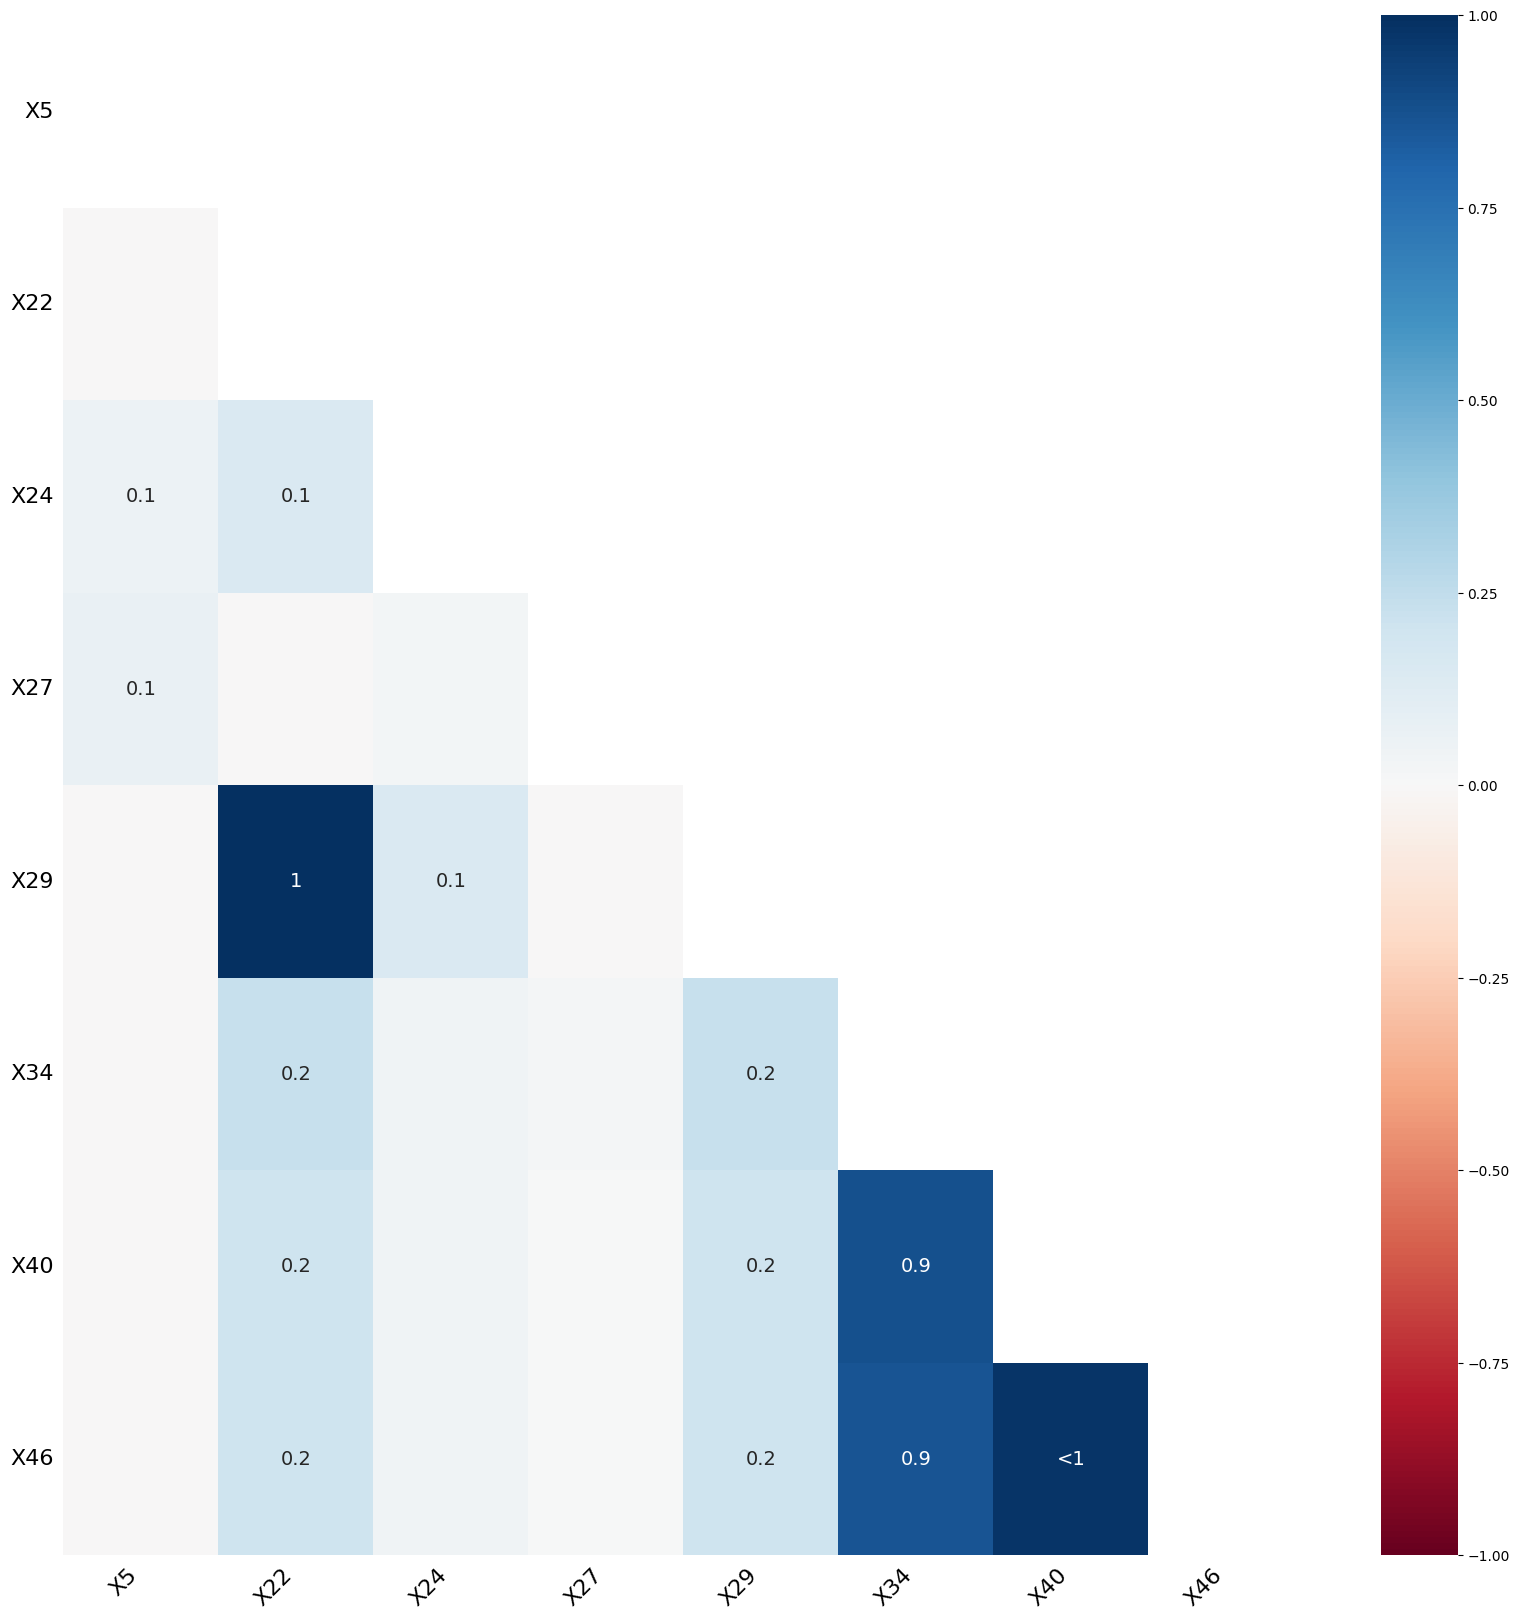

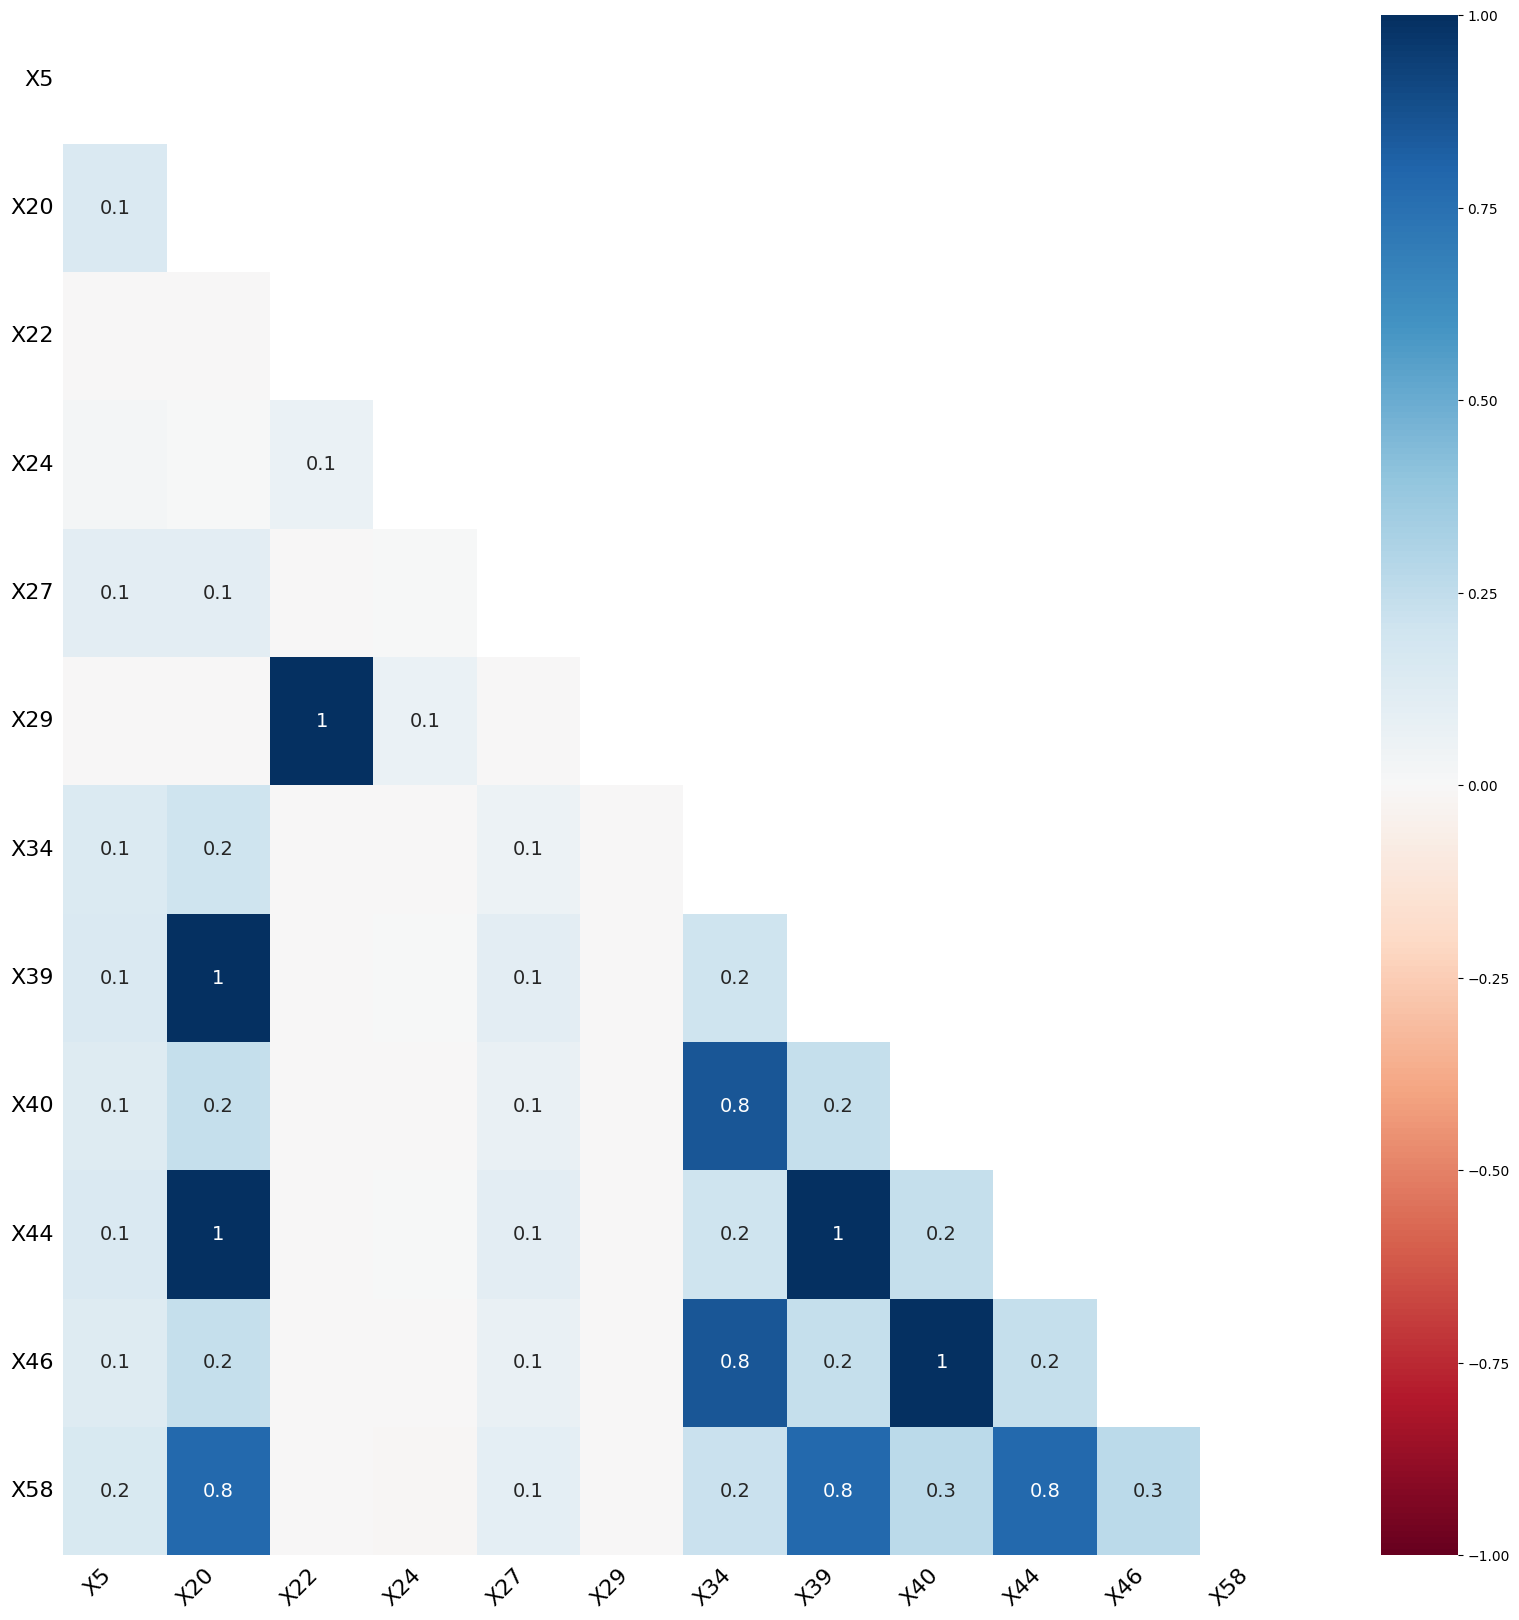

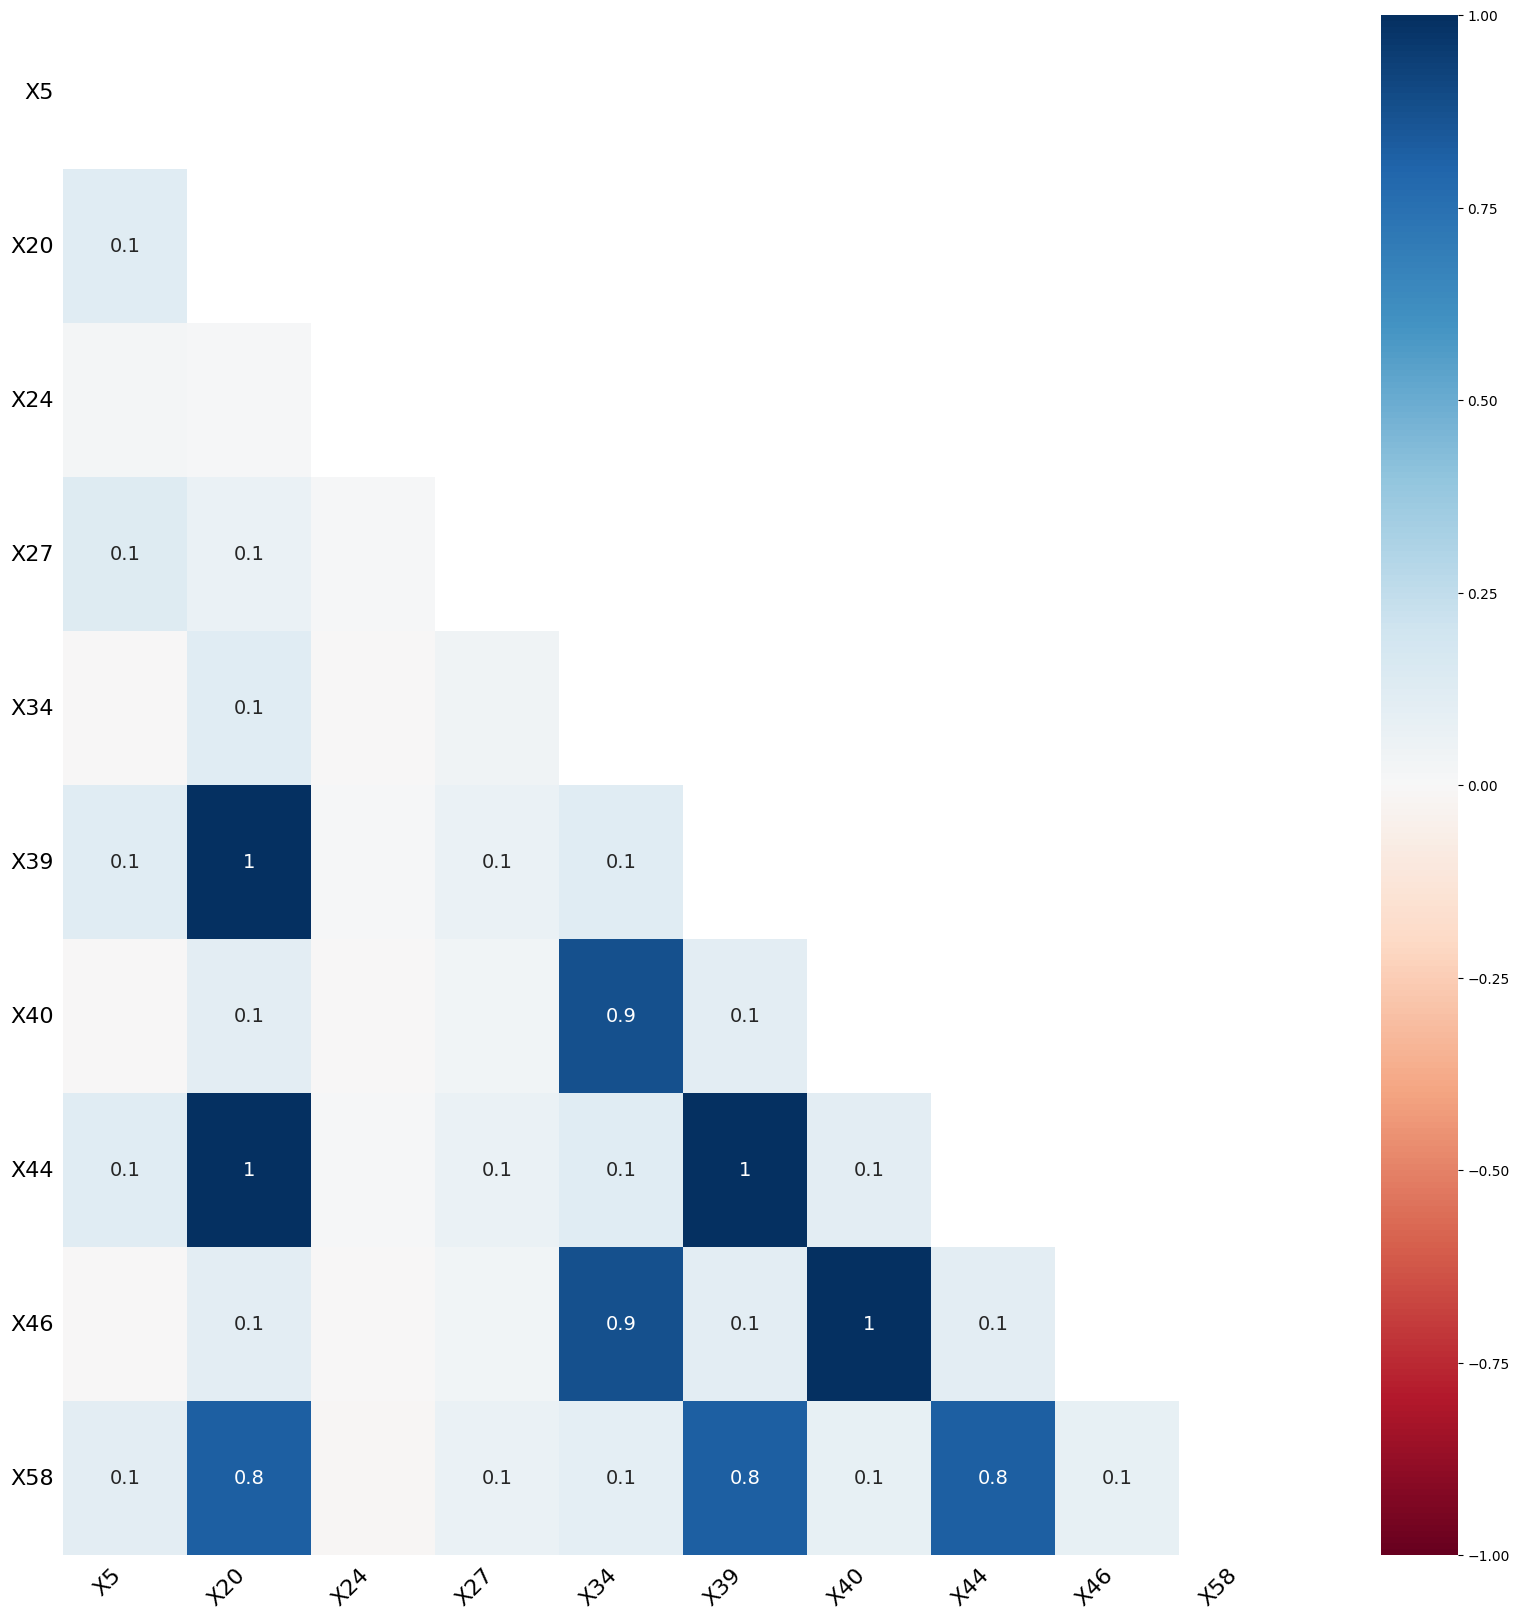

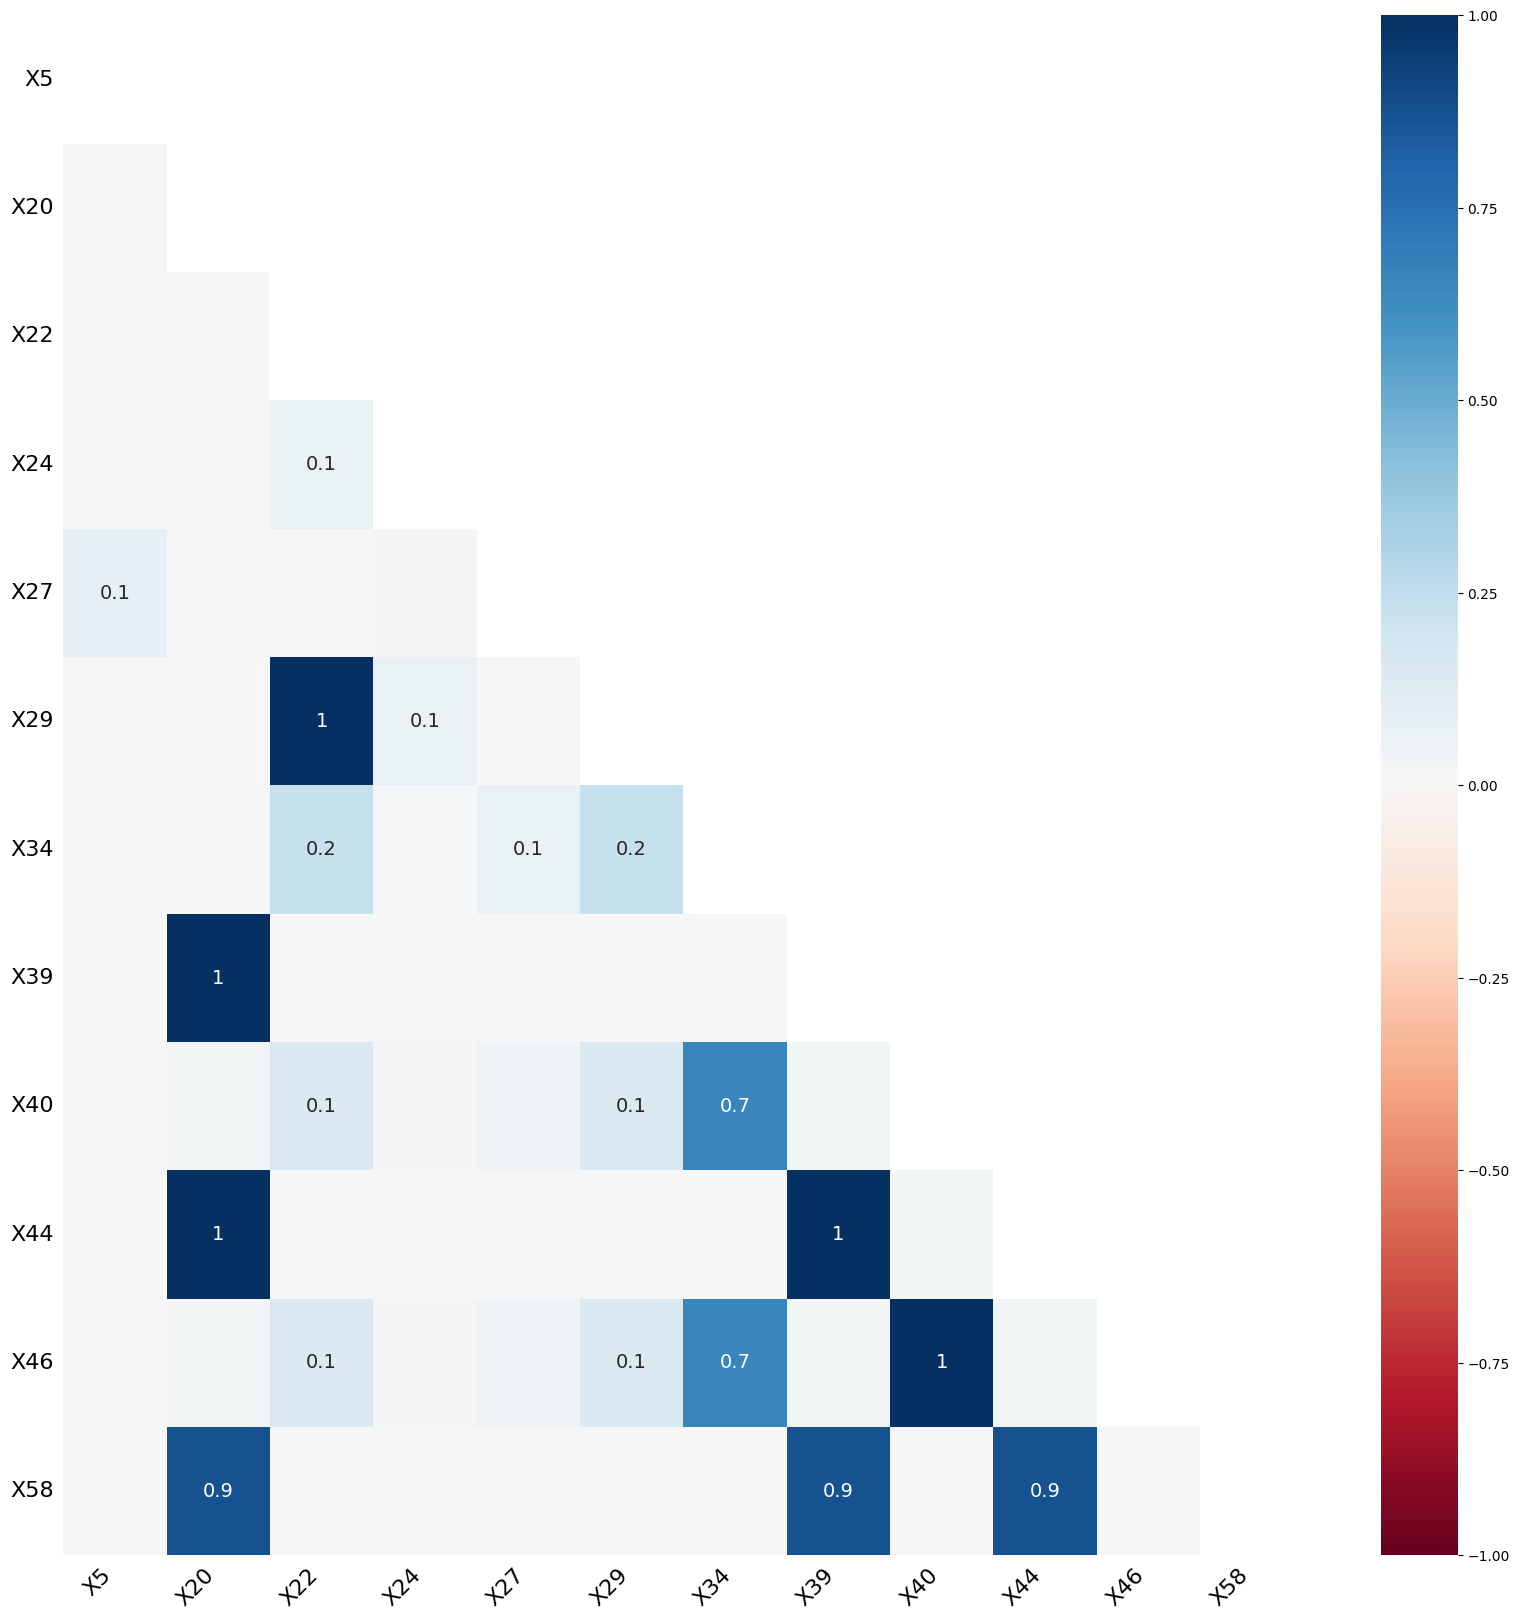

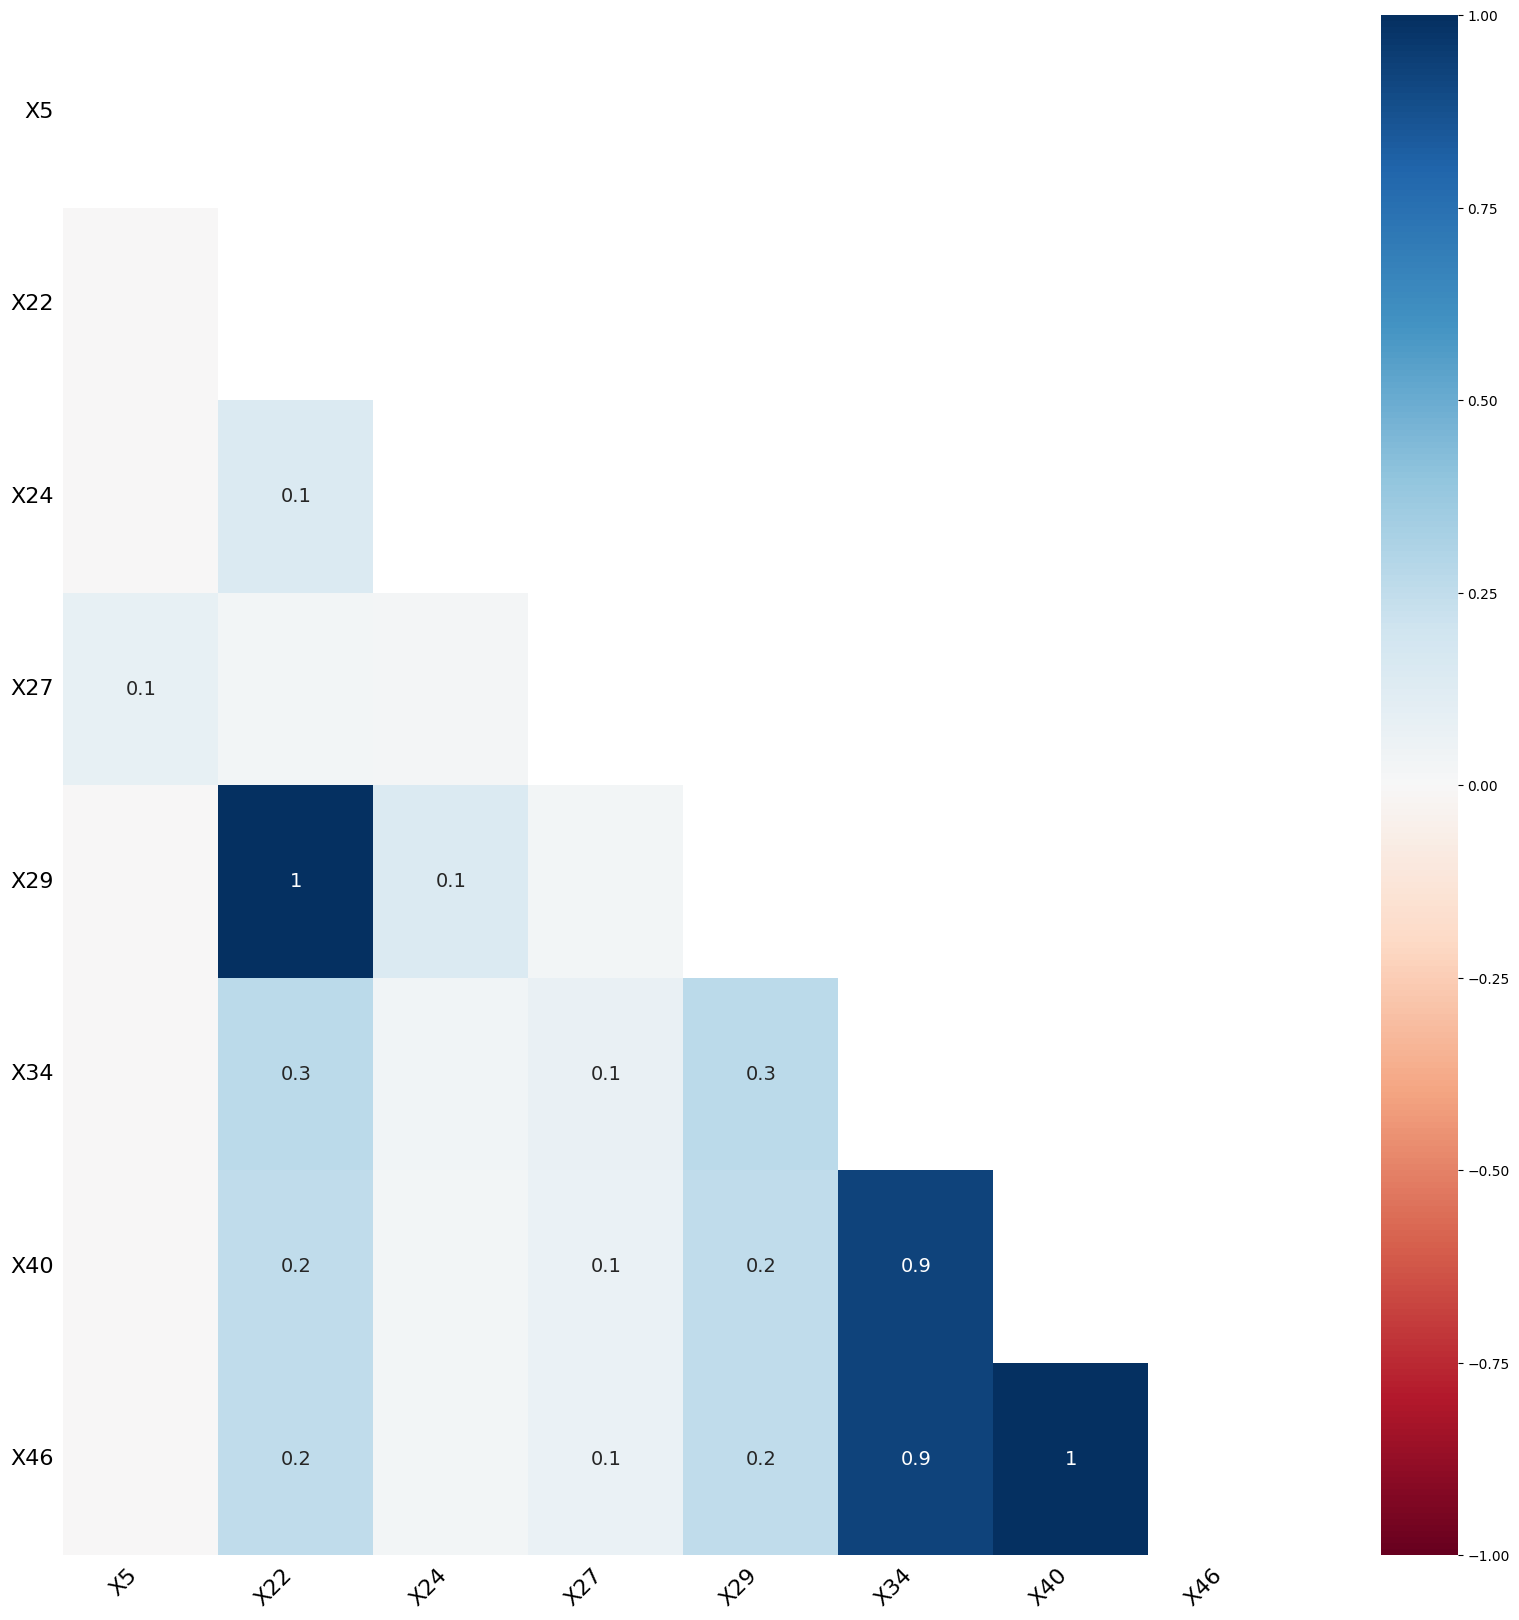

In [49]:
# generate the heatmap for all the dataframes
def generate_heatmap(dfs):
    for i in range(5):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.heatmap(dfs[i][missing_df_i], figsize=(20,20))
        
generate_heatmap(dataframes) 

3.B Data Imputation

3.B.a Mean Imputation

In [50]:
def perform_mean_imputation(dfs):
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
    Imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_Imp_dfs = [pd.DataFrame(Imp.fit_transform(df)) for df in dfs]
    for i in range(len(dfs)):
        mean_Imp_dfs[i].columns = dfs[i].columns   
    return mean_Imp_dfs

mean_Imp_dataframes = perform_mean_imputation(dataframes)

3.B.b k-Nearest Neighbors (k-NN) Imputation

In [51]:
def perform_knn_imputation(dfs):
    knn_imputed_datasets = [fancyimpute.KNN(k=100,verbose=True).fit_transform(dfs[i]) for i in range(len(dfs))]
    return [pd.DataFrame(data=knn_imputed_datasets[i]) for i in range(len(dfs))]
    
knn_Imp_dataframes = perform_knn_imputation(dataframes)
set_new_headers(knn_Imp_dataframes)

Imputing row 1/7027 with 0 missing, elapsed time: 4.358
Imputing row 101/7027 with 0 missing, elapsed time: 4.359
Imputing row 201/7027 with 1 missing, elapsed time: 4.360
Imputing row 301/7027 with 0 missing, elapsed time: 4.361
Imputing row 401/7027 with 0 missing, elapsed time: 4.362
Imputing row 501/7027 with 0 missing, elapsed time: 4.362
Imputing row 601/7027 with 0 missing, elapsed time: 4.362
Imputing row 701/7027 with 0 missing, elapsed time: 4.362
Imputing row 801/7027 with 0 missing, elapsed time: 4.362
Imputing row 901/7027 with 0 missing, elapsed time: 4.362
Imputing row 1001/7027 with 0 missing, elapsed time: 4.363
Imputing row 1101/7027 with 0 missing, elapsed time: 4.363
Imputing row 1201/7027 with 0 missing, elapsed time: 4.363
Imputing row 1301/7027 with 0 missing, elapsed time: 4.363
Imputing row 1401/7027 with 0 missing, elapsed time: 4.363
Imputing row 1501/7027 with 0 missing, elapsed time: 4.364
Imputing row 1601/7027 with 0 missing, elapsed time: 4.364
Imputing 

Imputing row 1/10503 with 0 missing, elapsed time: 9.976
Imputing row 101/10503 with 0 missing, elapsed time: 9.978
Imputing row 201/10503 with 1 missing, elapsed time: 9.981
Imputing row 301/10503 with 0 missing, elapsed time: 9.983
Imputing row 401/10503 with 0 missing, elapsed time: 9.985
Imputing row 501/10503 with 0 missing, elapsed time: 9.986
Imputing row 601/10503 with 0 missing, elapsed time: 9.986
Imputing row 701/10503 with 0 missing, elapsed time: 9.987
Imputing row 801/10503 with 0 missing, elapsed time: 9.987
Imputing row 901/10503 with 0 missing, elapsed time: 9.988
Imputing row 1001/10503 with 0 missing, elapsed time: 9.988
Imputing row 1101/10503 with 0 missing, elapsed time: 9.988
Imputing row 1201/10503 with 0 missing, elapsed time: 9.989
Imputing row 1301/10503 with 1 missing, elapsed time: 9.989
Imputing row 1401/10503 with 0 missing, elapsed time: 9.990
Imputing row 1501/10503 with 1 missing, elapsed time: 9.990
Imputing row 1601/10503 with 0 missing, elapsed time

Imputing row 1/5910 with 0 missing, elapsed time: 3.019
Imputing row 101/5910 with 1 missing, elapsed time: 3.021
Imputing row 201/5910 with 1 missing, elapsed time: 3.022
Imputing row 301/5910 with 0 missing, elapsed time: 3.022
Imputing row 401/5910 with 0 missing, elapsed time: 3.022
Imputing row 501/5910 with 0 missing, elapsed time: 3.023
Imputing row 601/5910 with 0 missing, elapsed time: 3.023
Imputing row 701/5910 with 0 missing, elapsed time: 3.023
Imputing row 801/5910 with 0 missing, elapsed time: 3.023
Imputing row 901/5910 with 0 missing, elapsed time: 3.023
Imputing row 1001/5910 with 0 missing, elapsed time: 3.023
Imputing row 1101/5910 with 0 missing, elapsed time: 3.024
Imputing row 1201/5910 with 0 missing, elapsed time: 3.024
Imputing row 1301/5910 with 0 missing, elapsed time: 3.024
Imputing row 1401/5910 with 0 missing, elapsed time: 3.024
Imputing row 1501/5910 with 0 missing, elapsed time: 3.024
Imputing row 1601/5910 with 0 missing, elapsed time: 3.025
Imputing 

In [52]:
imputed_dataframes_dictionary = OrderedDict()
imputed_dataframes_dictionary['Mean'] = mean_Imp_dataframes
imputed_dataframes_dictionary['k-NN'] = knn_Imp_dataframes

In [53]:
def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        print('Dataset: '+str(i+1)+'year')
        print(dfs[i].groupby('Y').size())
        minority_percent = (dfs[i]['Y'].tolist().count(1) / len(dfs[i]['Y'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)
        
check_data_imbalance(dataframes)

Dataset: 1year
Y
0    6756
1     271
dtype: int64
Minority (label 1) percentage: 3.856553294435748%
----------------------------------------------------------------
Dataset: 2year
Y
0    9773
1     400
dtype: int64
Minority (label 1) percentage: 3.931976801336872%
----------------------------------------------------------------
Dataset: 3year
Y
0    10008
1      495
dtype: int64
Minority (label 1) percentage: 4.712939160239932%
----------------------------------------------------------------
Dataset: 4year
Y
0    9277
1     515
dtype: int64
Minority (label 1) percentage: 5.259395424836601%
----------------------------------------------------------------
Dataset: 5year
Y
0    5500
1     410
dtype: int64
Minority (label 1) percentage: 6.937394247038917%
----------------------------------------------------------------


In [54]:
# Split the features and labels into separate dataframes for all the original dataframes
def split_dataframes_features_labels(dfs):
    feature_dfs = [dfs[i].iloc[:,0:12] for i in range(len(dfs))]
    label_dfs = [dfs[i].iloc[:,12] for i in range(len(dfs))]
    return feature_dfs, label_dfs

# Performs the SMOTE oversampling fro given dataframes.
def oversample_data_SMOTE(dfs, verbose=False):
    smote = SMOTE(sampling_strategy='auto' , random_state=42, k_neighbors=10)
    #Split the features and labels for each dataframe
    feature_dfs, label_dfs = split_dataframes_features_labels(dfs)
    resampled_feature_arrays = []
    resampled_label_arrays = []
    for i in range(len(dfs)):
        if verbose: print('Dataset: ' + str(i+1) + 'year:')
        if verbose: print('Original dataset shape {}'.format(Counter(label_dfs[i])))
        dfi_features_res, dfi_label_res = smote.fit_resample(feature_dfs[i], label_dfs[i])
        if verbose: print('Resampled dataset shape {}\n'.format(Counter(dfi_label_res)))
        # Append the resampled feature and label arrays of ith dataframe to their respective list of arrays    
        resampled_feature_arrays.append(dfi_features_res)
        resampled_label_arrays.append(dfi_label_res)        
    return resampled_feature_arrays, resampled_label_arrays

# Utility Function to convert the arrays of features and labels to pandas dataframes, and then join them.
# Also re-assign the columns headers.
def restructure_arrays_to_dataframes(feature_arrays, label_arrays):
    resampled_dfs = []
    for i in range(len(feature_arrays)):
        feature_df = pd.DataFrame(data=feature_arrays[i])
        label_df = pd.DataFrame(data=label_arrays[i])
        # Must set the column header for label_df, otherwise it wont join with feature_df, as columns overlap (with col names '0')
        label_df.columns=['Y'] 
        resampled_dfs.append(feature_df.join(label_df))
    # re-assign the column headers for features and labels    
    set_new_headers(resampled_dfs)    
    return resampled_dfs

# Perform SMOTE oversampling on all the imputed dataframes, and return them in a dictionary.
def perform_oversampling_on_imputed_dataframes(df_dict):
    imputed_oversampled_dataframes_dictionary = OrderedDict()
    for key,dfs in df_dict.items():
        print('SMOTE Oversampling for ' + key + ' imputed dataframes\n')
        smote_feature_arrays, smote_label_arrays = oversample_data_SMOTE(dfs, verbose=True)
        oversampled_dataframes = restructure_arrays_to_dataframes(smote_feature_arrays, smote_label_arrays)
        imputed_oversampled_dataframes_dictionary[key] = oversampled_dataframes
        print('-'*100)
    return imputed_oversampled_dataframes_dictionary

imputed_oversampled_dataframes_dictionary = perform_oversampling_on_imputed_dataframes(imputed_dataframes_dictionary)


SMOTE Oversampling for Mean imputed dataframes

Dataset: 1year:
Original dataset shape Counter({0.0: 6756, 1.0: 271})
Resampled dataset shape Counter({0.0: 6756, 1.0: 6756})

Dataset: 2year:
Original dataset shape Counter({0.0: 9773, 1.0: 400})
Resampled dataset shape Counter({0.0: 9773, 1.0: 9773})

Dataset: 3year:
Original dataset shape Counter({0.0: 10008, 1.0: 495})
Resampled dataset shape Counter({0.0: 10008, 1.0: 10008})

Dataset: 4year:
Original dataset shape Counter({0.0: 9277, 1.0: 515})
Resampled dataset shape Counter({0.0: 9277, 1.0: 9277})

Dataset: 5year:
Original dataset shape Counter({0.0: 5500, 1.0: 410})
Resampled dataset shape Counter({0.0: 5500, 1.0: 5500})

----------------------------------------------------------------------------------------------------
SMOTE Oversampling for k-NN imputed dataframes

Dataset: 1year:
Original dataset shape Counter({0.0: 6756, 1.0: 271})
Resampled dataset shape Counter({0.0: 6756, 1.0: 6756})

Dataset: 2year:
Original dataset shape

In [55]:
def prepare_kfold_cv_data(k, X, y, verbose=False):
    X = X.values
    y = y.values
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

In [56]:
# Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

In [57]:
# Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(penalty = 'none', random_state = 0)

In [58]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [59]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

In [61]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()

In [62]:
# creating a dictionary of models
models_dictionary = OrderedDict()

models_dictionary['Gaussian Naive Bayes'] = gnb_classifier
models_dictionary['Logistic Regression'] = lr_classifier
models_dictionary['Decision Tree'] = dt_classifier
models_dictionary['Extreme Gradient Boosting'] = xgb_classifier
models_dictionary['Random Forest'] = rf_classifier

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [64]:
# perform data modeling
def perform_data_modeling(_models_, _imputers_, verbose=False, k_folds=5):
    
    # 7 Models
    # 4 Imputers
    # 5 datasets (for 5 years)
    # 7 metrics, averaged over all the K-Folds
    model_results = OrderedDict()
    
    # Iterate over the models
    for model_name, clf in _models_.items():
        if verbose: print("-"*120, "\n", "Model: " + '\033[1m' + model_name + '\033[0m' + " Classifier")
        imputer_results = OrderedDict()
        
        # Iterate over the different imputed_data mechanisms (Mean, k-NN, EM, MICE)
        for imputer_name, dataframes_list in _imputers_.items():
            if verbose: print('\tImputer Technique: ' + '\033[1m' + imputer_name + '\033[0m')
            
            # call the split_dataframes_features_labels function to get a list of features and labels for all the dataframes
            feature_dfs, label_dfs = split_dataframes_features_labels(dataframes_list)            
            
            year_results = OrderedDict()
            
            # Iterate over dataframe_list individually
            for df_index in range(len(dataframes_list)):
                if verbose: print('\t\tDataset: ' + '\033[1m' + str(df_index+1) + 'year' + '\033[0m')
                
                # Calling the 'prepare_kfold_cv_data' returns lists of features and labels 
                # for train and test sets respectively.
                # The number of items in the list is equal to k_folds
                X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(k_folds, feature_dfs[df_index], label_dfs[df_index], verbose)
                
                metrics_results = OrderedDict()
                accuracy_list = np.zeros([k_folds])
                precision_list = np.zeros([k_folds,2])
                recall_list = np.zeros([k_folds,2])
                TN_list = np.zeros([k_folds])
                FP_list = np.zeros([k_folds])
                FN_list = np.zeros([k_folds])
                TP_list = np.zeros([k_folds])                
                
                # Iterate over all the k-folds
                for k_index in range(k_folds):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]
                    
                    
                    # Fit the model and 
                    clf = clf.fit(X_train, y_train)
                    y_test_predicted = clf.predict(X_test)
                    
                    #code for calculating accuracy 
                    _accuracy_ = accuracy_score(y_test, y_test_predicted, normalize=True)
                    accuracy_list[k_index] = _accuracy_
                    
                    #code for calculating recall 
                    _recalls_ = recall_score(y_test, y_test_predicted, average=None)
                    recall_list[k_index] = _recalls_
                    
                    #code for calculating precision 
                    _precisions_ = precision_score(y_test, y_test_predicted, average=None)
                    precision_list[k_index] = _precisions_
                    
                    #code for calculating confusion matrix 
                    _confusion_matrix_ = confusion_matrix(y_test, y_test_predicted)
                    TN_list[k_index] = _confusion_matrix_[0][0]
                    FP_list[k_index] = _confusion_matrix_[0][1]
                    FN_list[k_index] = _confusion_matrix_[1][0]
                    TP_list[k_index] = _confusion_matrix_[1][1]
                
                # creating a metrics dictionary
                metrics_results['Accuracy'] = np.mean(accuracy_list)
                metrics_results['Precisions'] = np.mean(precision_list, axis=0)
                metrics_results['Recalls'] = np.mean(recall_list, axis=0)
                metrics_results['TN'] = np.mean(TN_list)
                metrics_results['FP'] = np.mean(FP_list)
                metrics_results['FN'] = np.mean(FN_list)
                metrics_results['TP'] = np.mean(TP_list)
                
                if verbose:
                    print('\t\t\tAccuracy:', metrics_results['Accuracy'])
                    print('\t\t\tPrecision:', metrics_results['Precisions'])
                    print('\t\t\tRecall:', metrics_results['Recalls'])
                
                year_results[str(df_index+1)+'year'] = metrics_results   
                
            imputer_results[imputer_name] = year_results
            
        model_results[model_name] = imputer_results  
        
    return model_results                

In [65]:
results = perform_data_modeling(models_dictionary, imputed_oversampled_dataframes_dictionary, verbose=True, k_folds=5)

------------------------------------------------------------------------------------------------------------------------ 
 Model: Gaussian Naive Bayes Classifier
	Imputer Technique: Mean
		Dataset: 1year
			Accuracy: 0.5043665056207252
			Precision: [0.66512006 0.50220567]
			Recall: [0.01682798 0.99188381]
		Dataset: 2year
			Accuracy: 0.5073161482551578
			Precision: [0.65153404 0.50375035]
			Recall: [0.03212207 0.98251265]
		Dataset: 3year
			Accuracy: 0.5153876600541603
			Precision: [0.75062888 0.5079336 ]
			Recall: [0.04644429 0.98430531]
		Dataset: 4year
			Accuracy: 0.5026952870500102
			Precision: [0.53718869 0.50140305]
			Recall: [0.03851172 0.96689555]
		Dataset: 5year
			Accuracy: 0.5439090909090909
			Precision: [0.57327134 0.63037336]
			Recall: [0.54030352 0.53919592]
	Imputer Technique: k-NN
		Dataset: 1year
			Accuracy: 0.5033302909588901
			Precision: [0.61020214 0.50168545]
			Recall: [0.01712596 0.98951938]
		Dataset: 2year
			Accuracy: 0.5076743092044786
			Prec

In [66]:
# model -> imputer -> year
def perform_model_ranking(models, imputers, results):
    column_headers = ['-'] + list(imputers.keys())
    rows = []
    for model_name, model_details in results.items():
        row = [model_name]
        for imputer_name, imputer_details in model_details.items():
            mean_accuracy = 0
            for year, metrics in imputer_details.items():
                mean_accuracy += metrics['Accuracy']
            mean_accuracy = mean_accuracy/len(imputer_details)
            row.append(mean_accuracy)
        rows.append(row)
    results_df = pd.DataFrame(data=rows, columns = column_headers)
    return results_df

In [67]:
perform_model_ranking(models_dictionary, imputed_oversampled_dataframes_dictionary, results)

,-,Mean,k-NN
0,Gaussian Naive Bayes,0.514735,0.509989
1,Logistic Regression,0.550503,0.582848
2,Decision Tree,0.921371,0.901228
3,Extreme Gradient Boosting,0.972281,0.963444
4,Random Forest,0.944152,0.929063


In [68]:
import pickle

In [69]:
file=open('egb.pkl','wb')
pickle.dump(xgb_classifier,file)
file.close()


In [71]:
pickled_model = pickle.load(open('egb.pkl', 'rb'))


In [72]:
z = [[-18.907000,27.092000,0.040401,0.901840,1.463700,4.966700,2.364400,0.020169,0.022858,29.360000,0.620610,1.012200]]
y = pd.DataFrame(z)
pickled_model.predict(y)

array([1])

In [73]:
!pip install streamlit --quiet

In [81]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import pickle
from PIL import Image

model= pickle.load(open('egb.pkl','rb'))

def run():
    menu = ['Home','Bankruptcy Prediction App']
    choice= st.sidebar.selectbox('Menu',menu)
    if choice== 'Home':
      st.title("Corporate Bankruptcy")
      st.header('What is Bankruptcy?')
      st.write('Bankruptcy is the inability of a person or a buusiness to pay their debt.')
      st.write('It involves the sale of property and some other arrangement to pay as mush as possible of the ,oney of a person or business entity owe.')
      st.write('Bankruptcy is a legal proceeding involving a person or business that is unable to repay their outstanding debts.')
      st.write(' The bankruptcy process begins with a petition filed by the debtor, which is most common, or on behalf of creditors,which is less common.')
      st.write('All of the debtors assets are measured and evaluated, and the assets may be used to repay a portion of outstanding debt.')
      st.subheader('About the Machine Learning Model and Developer')
      st.markdown('''### Model Algorithm : Random Forest Classifier''')
      st.markdown('''### Model Accuracy: 94.5746%''')
      st.markdown('''## Model Developed by Karan Singh Thakur, Ridhhi Aggarwal''')
      st.markdown('''### contact: kthakur1_be20@thapar.edu, raggarwal1_be20@thapar.edu''')
      
    elif choice== 'Bankruptcy Prediction App':
      st.title("Corporate Bankruptcy prediction Model")
      st.subheader("This model will predict if a company would Bankrupt in future or not")
      #Company Name:
      comp_name= st.text_input('Company Name')
    # [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365
      attr5= st.number_input(' [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365')
    #(gross profit + depreciation) / sales
      attr13= st.number_input('(gross profit + depreciation) / sales')
    #(inventory * 365) / sales
      attr20= st.number_input('(inventory * 365) / sales')
    #profit on operating activities / total assets
      attr22= st.number_input('profit on operating activities / total assets')
    #gross profit (in 3 years) / total assets
      attr24=st.number_input('gross profit (in 3 years) / total assets')
    #profit on operating activities / financial expenses
      attr27= st.number_input('profit on operating activities / financial expenses')
    #logarithm of total assets
      attr29= st.number_input('logarithm of total assets')
    #operating expenses / total liabilities
      attr34= st.number_input('operating expenses / total liabilities')
    #(current assets - inventory - receivables) / short-term liabilities
      attr40= st.number_input('(current assets - inventory - receivables) / short-term liabilities')
    #(receivables * 365) / sales
      attr44= st.number_input('(receivables * 365) / sales')
    #(current assets - inventory) / short-term liabilities
      attr46= st.number_input('(current assets - inventory) / short-term liabilities')
    #total costs /total sales
      attr58= st.number_input('total costs /total sales')
    #''Attr5', 'Attr13', 'Attr20', 'Attr22', 'Attr24', 'Attr27', 'Attr29',
       #'Attr34', 'Attr40', 'Attr44', 'Attr46', 'Attr58
      features= [[attr5,attr13,attr20,attr22,attr24,attr27,
                attr29,attr34,attr40,attr44,attr46,attr58 ]]
      print(features)
      ans = y = model.predict(features)
      if st.button("Predict"):
        if ans == 0:
          st.warning("Your Company " + comp_name + ' is in low risk for bankruptcy.')
        else:
          st.success("Your Company " + comp_name + ' is in high risk for bankruptcy.')

if __name__ == "__main__":
  run()

Writing app.py


In [ ]:
!streamlit run app.py 


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.29.93:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 27.092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 27.092, 0.040401, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 27.092, 0.040401, 0.90184, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 27.092, 0.040401, 0.90184, 1.4637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 27.092, 0.040401, 0.90184, 1.4637, 4.93, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 27.092, 0.040401, 0.90184, 1.4637, 4.93, 2.3644, 0.0, 0.0, 0.0, 0.0, 0.0]]
[[-18.907, 27.092, 0.040401, 0.90184, 1.4637, 4.93, 2.3644, 0.020169, 0.0, 0.

In [ ]:
pip freeze > requirements.txt